In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR ='.'
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "models")
os.makedirs(IMAGE_PATH, exist_ok=True)
os.makedirs(MODEL_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." +fig_extension)
    print("Saving figure", fig_id)
    
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



In [2]:
print(tf.__version__,keras.__version__)

2.2.0 2.3.0-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [4]:
y_train_full.shape

(60000,)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
X_train.dtype

dtype('float64')

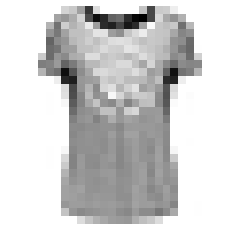

In [7]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names = ["T-shirts/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


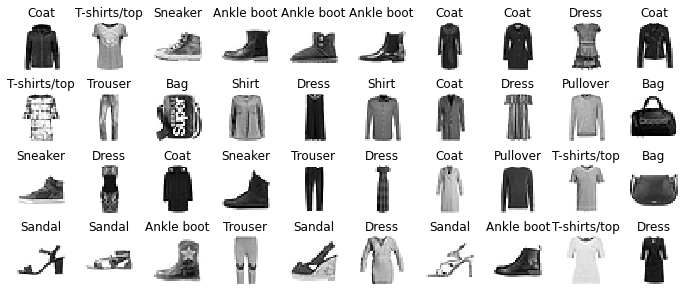

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(50,activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
keras.backend.clear_session()
np.random.seed(2)
tf.random.set_seed(2)
model.layers

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [33]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7249 - accuracy: 0.7556 - val_loss: 0.5791 - val_accuracy: 0.7952
Epoch 2/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4832 - accuracy: 0.8295 - val_loss: 0.4418 - val_accuracy: 0.8448
Epoch 3/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4355 - accuracy: 0.8454 - val_loss: 0.4486 - val_accuracy: 0.8298
Epoch 4/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4046 - accuracy: 0.8565 - val_loss: 0.4283 - val_accuracy: 0.8372
Epoch 5/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3817 - accuracy: 0.8630 - val_loss: 0.3692 - val_accuracy: 0.8674
Epoch 6/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3642 - accuracy: 0.8694 - val_loss: 0.3654 - val_accuracy: 0.8718
Epoch 7/50
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3490 - accuracy: 0.8744 - val_loss: 0.3874 - val_accuracy:

In [34]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

Saving figure kears_learning_curves_plot


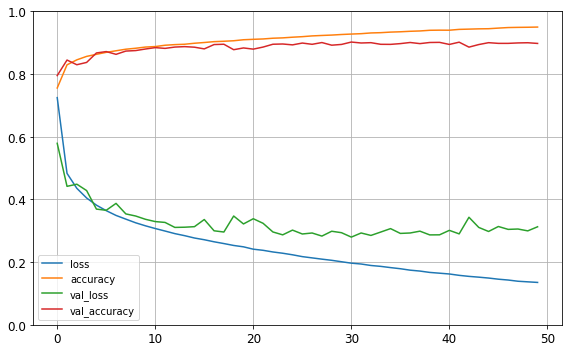

In [35]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("kears_learning_curves_plot")
plt.show()

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3494 - accuracy: 0.8872


[0.34940609335899353, 0.8871999979019165]

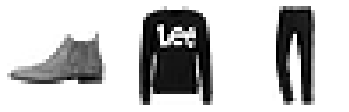

In [37]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = model.predict_classes(X_new)

for i,j in enumerate(X_new):
    plt.subplot(1,3, i+1)
    plt.imshow(X_new[i], cmap="binary")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [38]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U12')

In [39]:
model.save(MODEL_PATH + "/fmnist/model.h5")